In [273]:
# import libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import normalize
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from graphviz import Source
import xgboost as xgb
from xgboost import plot_tree
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score, precision_score, classification_report,accuracy_score,confusion_matrix, roc_curve, auc, roc_curve,accuracy_score,plot_confusion_matrix
from sklearn.preprocessing import StandardScaler, normalize

In [274]:
y = pd.read_csv('data/archive/actual.csv')
train = pd.read_csv('data/archive/data_set_ALL_AML_train.csv')
test = pd.read_csv('data/archive/data_set_ALL_AML_independent.csv')
y.head()
train.head()

,Gene Description,Gene Accession Number,1,call,2,call.1,3,call.2,4,call.3,...,29,call.33,30,call.34,31,call.35,32,call.36,33,call.37
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-214,A,-139,A,-76,A,-135,A,...,15,A,-318,A,-32,A,-124,A,-135,A
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-153,A,-73,A,-49,A,-114,A,...,-114,A,-192,A,-49,A,-79,A,-186,A
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,-58,A,-1,A,-307,A,265,A,...,2,A,-95,A,49,A,-37,A,-70,A
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,88,A,283,A,309,A,12,A,...,193,A,312,A,230,P,330,A,337,A
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-295,A,-264,A,-376,A,-419,A,...,-51,A,-139,A,-367,A,-188,A,-407,A


In [275]:
# Drop the call collumns from both data sets
call_cols_train = [col for col in train.columns if 'call' in col]
train = train.drop(call_cols_train, axis = 1)

call_cols_test = [col for col in test.columns if 'call' in col]
test = test.drop(call_cols_test, axis = 1)

train = train.T
test = test.T


train.head()
### Drop "Gene Description" and "Gene Accession Number"
##cols_to_drop = ['Gene Description', 'Gene Accession Number']
##train_data = train_data.drop(cols_to_drop, axis = 1)
##test_data = test_data.drop(cols_to_drop, axis = 1)

# Transpose both data_sets
#train_data = train_data.T
#test_data = test_data.T

,0,1,2,3,4,5,6,7,8,9,...,7119,7120,7121,7122,7123,7124,7125,7126,7127,7128
Gene Description,AFFX-BioB-5_at (endogenous control),AFFX-BioB-M_at (endogenous control),AFFX-BioB-3_at (endogenous control),AFFX-BioC-5_at (endogenous control),AFFX-BioC-3_at (endogenous control),AFFX-BioDn-5_at (endogenous control),AFFX-BioDn-3_at (endogenous control),AFFX-CreX-5_at (endogenous control),AFFX-CreX-3_at (endogenous control),AFFX-BioB-5_st (endogenous control),...,Transcription factor Stat5b (stat5b) mRNA,Breast epithelial antigen BA46 mRNA,GB DEF = Calcium/calmodulin-dependent protein ...,TUBULIN ALPHA-4 CHAIN,CYP4B1 Cytochrome P450; subfamily IVB; polypep...,PTGER3 Prostaglandin E receptor 3 (subtype EP3...,HMG2 High-mobility group (nonhistone chromosom...,RB1 Retinoblastoma 1 (including osteosarcoma),GB DEF = Glycophorin Sta (type A) exons 3 and ...,GB DEF = mRNA (clone 1A7)
Gene Accession Number,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
1,-214,-153,-58,88,-295,-558,199,-176,252,206,...,185,511,-125,389,-37,793,329,36,191,-37
2,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,169,837,-36,442,-17,782,295,11,76,-14
3,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,315,1199,33,168,52,1138,777,41,228,-41


In [276]:
train.columns

RangeIndex(start=0, stop=7129, step=1)

In [277]:
train.columns = train.iloc[1]
train.columns

Index(['AFFX-BioB-5_at', 'AFFX-BioB-M_at', 'AFFX-BioB-3_at', 'AFFX-BioC-5_at',
       'AFFX-BioC-3_at', 'AFFX-BioDn-5_at', 'AFFX-BioDn-3_at',
       'AFFX-CreX-5_at', 'AFFX-CreX-3_at', 'AFFX-BioB-5_st',
       ...
       'U48730_at', 'U58516_at', 'U73738_at', 'X06956_at', 'X16699_at',
       'X83863_at', 'Z17240_at', 'L49218_f_at', 'M71243_f_at', 'Z78285_f_at'],
      dtype='object', name='Gene Accession Number', length=7129)

In [278]:
cols_to_drop = ['Gene Description', 'Gene Accession Number']
# Clean up the column names for training data
train.columns = train.iloc[1]
train = train.drop(["Gene Description", "Gene Accession Number"]).apply(pd.to_numeric)

# Clean up the column names for training data
test.columns = test.iloc[1]
test = test.drop(["Gene Description", "Gene Accession Number"]).apply(pd.to_numeric)

In [294]:
train

,Gene Description,Gene Accession Number,1,call,2,call.1,3,call.2,4,call.3,...,29,call.33,30,call.34,31,call.35,32,call.36,33,call.37
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-214,A,-139,A,-76,A,-135,A,...,15,A,-318,A,-32,A,-124,A,-135,A
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-153,A,-73,A,-49,A,-114,A,...,-114,A,-192,A,-49,A,-79,A,-186,A
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,-58,A,-1,A,-307,A,265,A,...,2,A,-95,A,49,A,-37,A,-70,A
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,88,A,283,A,309,A,12,A,...,193,A,312,A,230,P,330,A,337,A
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-295,A,-264,A,-376,A,-419,A,...,-51,A,-139,A,-367,A,-188,A,-407,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7124,PTGER3 Prostaglandin E receptor 3 (subtype EP3...,X83863_at,793,A,782,A,1138,A,627,A,...,279,A,737,A,588,A,1170,A,2315,A
7125,HMG2 High-mobility group (nonhistone chromosom...,Z17240_at,329,A,295,A,777,P,170,A,...,51,A,227,A,361,A,284,A,250,A
7126,RB1 Retinoblastoma 1 (including osteosarcoma),L49218_f_at,36,A,11,A,41,A,-50,A,...,6,A,-9,A,-26,A,39,A,-12,A
7127,GB DEF = Glycophorin Sta (type A) exons 3 and ...,M71243_f_at,191,A,76,A,228,A,126,A,...,2484,P,371,A,133,A,298,A,790,P


In [280]:
print(f'Shape for train data: {train.shape}')
print(f'Shape for test data: {test.shape}')

Shape for train data: (38, 7129)
Shape for test data: (34, 7129)


In [281]:
#y = y.replace({'ALL': 0, 'AML': 1})
#label_encoder = LabelEncoder()
#y['CancerColumn'] = label_encoder.fit_transform(y['cancer'])

#cancer_types_before_encoding = y['cancer'].unique()
#print('\n--- Cancer types before label encoding: \n', cancer_types_before_encoding)

#cancer_types_after_encoding = y['CancerColumn'].unique()
#print('\n--- Cancer types after label encoding: \n', cancer_types_after_encoding)

#y.head()

In [282]:
#drop the 'cancer' column
#y = y.drop('cancer', axis = 1)
#y.head()

In [293]:
# data sets for training
#train_X = train.reset_index(drop=True)
#train_y = y[y.patient <= 38].reset_index(drop=True)

# data sets for testing
#test_X = test.reset_index(drop=True)
#test_y = y[y.patient > 38].reset_index(drop=True)
#train_y
y['cancer'].value_counts() 
y = y.replace({'ALL':0,'AML':1}) 
X_train = train.reset_index(drop=True) 
y_train = y[y.patient <= 38].reset_index(drop=True) 
X_test = test.reset_index(drop=True) 
y_test = y[y.patient > 38].reset_index(drop=True) 
y_test.iloc[:,1].values
y_test = y_test.iloc[:,1].values
y_test
y_train = y_train.iloc[:,1].values 
sc= StandardScaler() 
X_test = sc.fit_transform(X_test) 
X_train = sc.fit_transform(X_train) 

,Gene Description,Gene Accession Number,1,call,2,call.1,3,call.2,4,call.3,...,29,call.33,30,call.34,31,call.35,32,call.36,33,call.37
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-214,A,-139,A,-76,A,-135,A,...,15,A,-318,A,-32,A,-124,A,-135,A
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-153,A,-73,A,-49,A,-114,A,...,-114,A,-192,A,-49,A,-79,A,-186,A
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,-58,A,-1,A,-307,A,265,A,...,2,A,-95,A,49,A,-37,A,-70,A
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,88,A,283,A,309,A,12,A,...,193,A,312,A,230,P,330,A,337,A
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-295,A,-264,A,-376,A,-419,A,...,-51,A,-139,A,-367,A,-188,A,-407,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7124,PTGER3 Prostaglandin E receptor 3 (subtype EP3...,X83863_at,793,A,782,A,1138,A,627,A,...,279,A,737,A,588,A,1170,A,2315,A
7125,HMG2 High-mobility group (nonhistone chromosom...,Z17240_at,329,A,295,A,777,P,170,A,...,51,A,227,A,361,A,284,A,250,A
7126,RB1 Retinoblastoma 1 (including osteosarcoma),L49218_f_at,36,A,11,A,41,A,-50,A,...,6,A,-9,A,-26,A,39,A,-12,A
7127,GB DEF = Glycophorin Sta (type A) exons 3 and ...,M71243_f_at,191,A,76,A,228,A,126,A,...,2484,P,371,A,133,A,298,A,790,P


In [284]:
#train_y = train_y.iloc[:,1]
#train_y = list(train_y)
#test_y = test_y.iloc[:,1]
#test_y = list(test_y)

In [285]:
y_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [286]:
# convert from integer to float
#train_X = train_X.astype(float, 64)
#test_X = test_X.astype(float, 64)

scaler = StandardScaler()
train_X_scaled = scaler.fit_transform(X_train)
test_X_scaled = scaler.fit_transform(X_test) 

In [287]:
pca = PCA()
train_X_scaled_copy = train_X_scaled
pca.fit_transform(train_X_scaled_copy)

array([[ 1.85447987e+01,  5.82694304e+00, -1.94423127e+01, ...,
        -3.14979582e+00, -5.19942835e-01,  1.45162143e-14],
       [-7.34138894e+00,  1.00086631e+01,  1.17956977e+01, ...,
         3.91741309e+00, -2.34562750e-01,  1.45162143e-14],
       [ 5.28521459e+01,  1.13906298e+01, -2.95485659e+01, ...,
        -3.08792878e+00,  3.61420168e+00,  1.45162143e-14],
       ...,
       [ 3.29958693e+00, -2.63018075e+01,  8.76633590e-01, ...,
        -7.79008035e-01, -5.71406496e+00,  1.45162143e-14],
       [ 3.14422261e+01, -8.74368454e+00,  9.76210148e+00, ...,
         2.42913115e+00,  4.83899287e-01,  1.45162143e-14],
       [ 7.48350965e+01, -2.30086262e+01,  4.09630984e+01, ...,
         6.81823148e-01,  1.78649973e+00,  1.45162143e-14]])

28 features explain around 90% of the variance


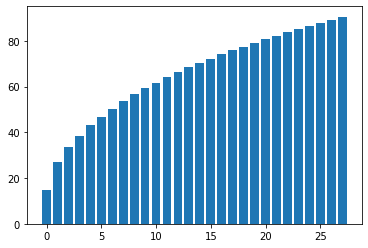

In [288]:
total = sum(pca.explained_variance_)
no_features = 0
current_variance = 0
while current_variance/total < 0.90:
    current_variance += pca.explained_variance_[no_features]
    no_features = no_features + 1
    
print(f'{no_features} features explain around 90% of the variance')

pca = PCA(n_components = no_features)
train_X_pca = pca.fit_transform(X_train)
test_X_pca = pca.transform(X_test)

var_exp = pca.explained_variance_ratio_.cumsum()
var_exp = var_exp * 100
plt.bar(range(no_features), var_exp);

In [291]:
ds_model = DecisionTreeClassifier(criterion='gini', max_depth = 4)

ds_model.fit(X_train, y_train)
             
prediction= ds_model.predict(X_test)
 

acc_decision_tree = accuracy_score(prediction,y_test)

rf_cm = confusion_matrix(y_test, prediction)   
print(rf_cm)  
rf_ac=accuracy_score(y_test, prediction) 
print(rf_ac)


accuracy = accuracy_score(test_y, prediction)
print("The standard decision tree has an accuracy of {} and an error rate of {}.".format(accuracy, 1-accuracy))

[[13  7]
 [ 6  8]]
0.6176470588235294
The standard decision tree has an accuracy of 0.6176470588235294 and an error rate of 0.38235294117647056.


In [292]:
y = pd.read_csv('data/archive/actual.csv')
train = pd.read_csv('data/archive/data_set_ALL_AML_train.csv')
test = pd.read_csv('data/archive/data_set_ALL_AML_independent.csv')
y.head()
train.head()

,Gene Description,Gene Accession Number,1,call,2,call.1,3,call.2,4,call.3,...,29,call.33,30,call.34,31,call.35,32,call.36,33,call.37
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-214,A,-139,A,-76,A,-135,A,...,15,A,-318,A,-32,A,-124,A,-135,A
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-153,A,-73,A,-49,A,-114,A,...,-114,A,-192,A,-49,A,-79,A,-186,A
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,-58,A,-1,A,-307,A,265,A,...,2,A,-95,A,49,A,-37,A,-70,A
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,88,A,283,A,309,A,12,A,...,193,A,312,A,230,P,330,A,337,A
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-295,A,-264,A,-376,A,-419,A,...,-51,A,-139,A,-367,A,-188,A,-407,A
